# IOWA Liquor Sales Analysis

Analysis of Iowa liquor sales trends using BigQuery public datasets. Includes sales performance metrics, growth patterns, geographic distribution, and temporal trends visualized through data exported from SQL queries.

**Annual Sales Trends and Year-over-Year Growth Analysis**

Visualizes Iowa liquor sales performance from 2012-2025 through four complementary charts:
total sales timeline, year-over-year growth rates, annual sales comparison, and a dual-axis
view combining both metrics. Includes summary statistics highlighting peak performance years,
growth patterns, and market trends.

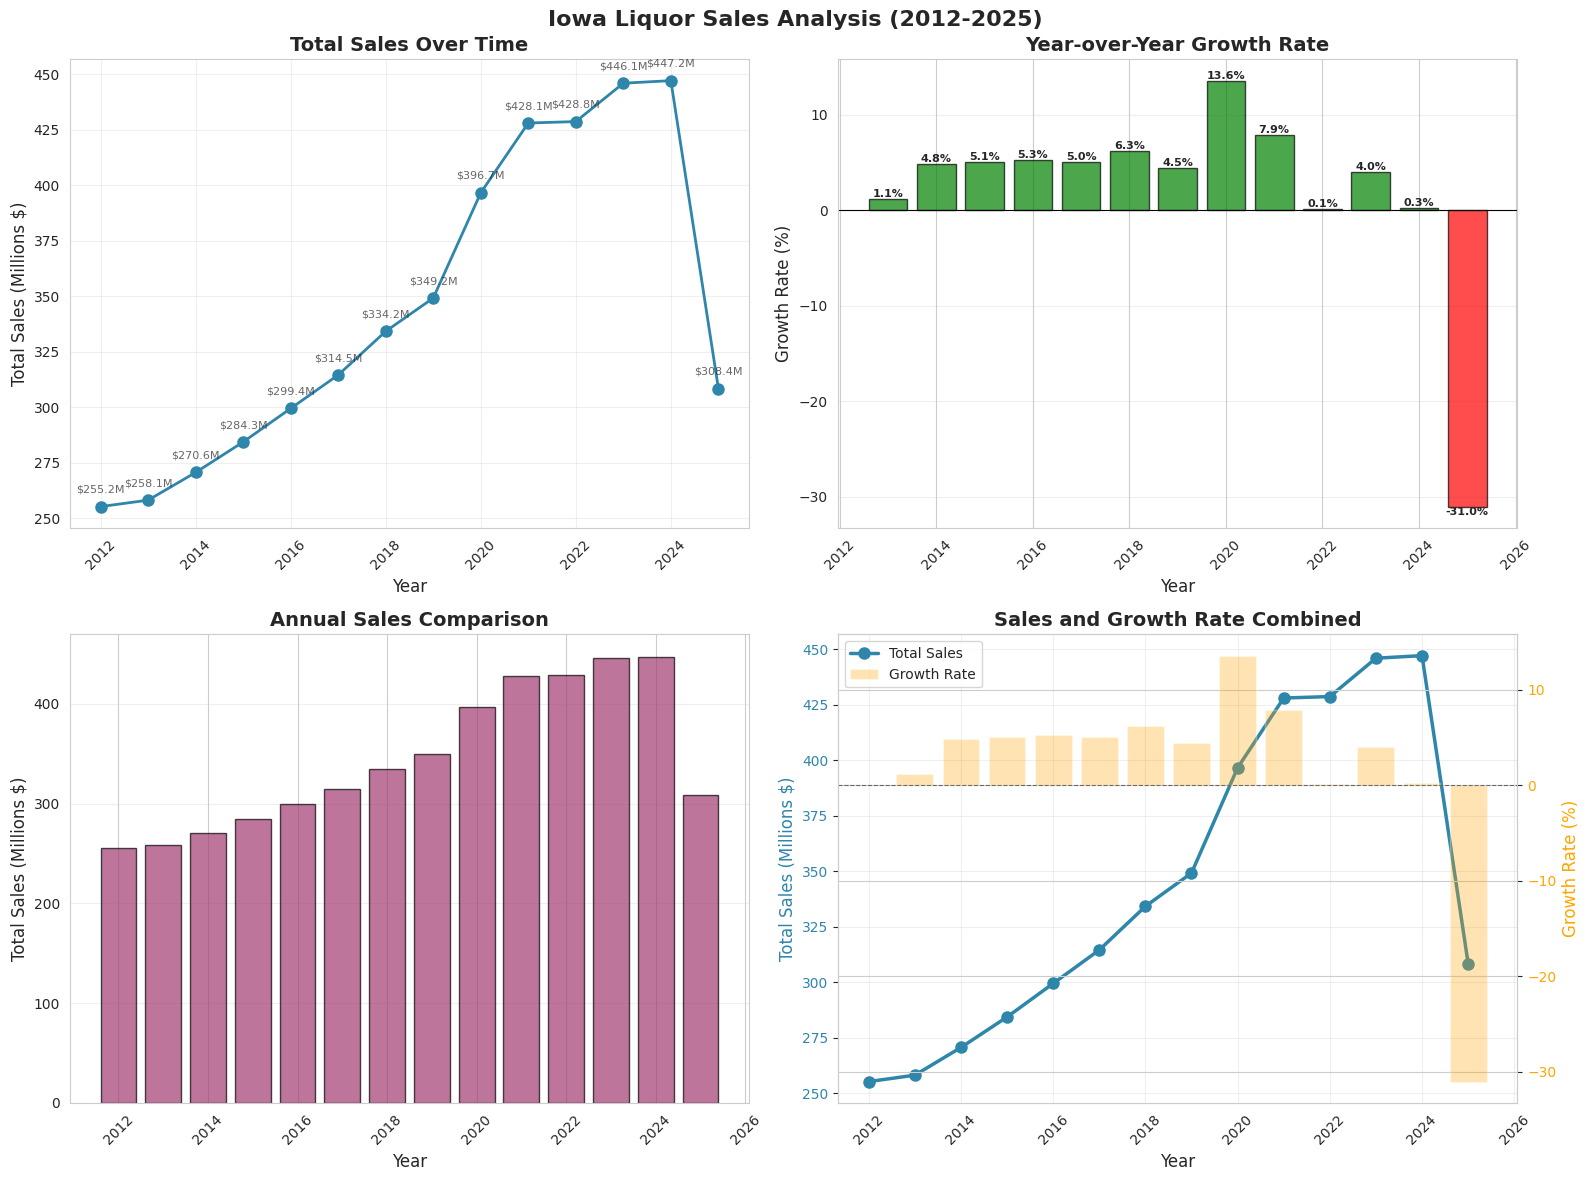


SALES SUMMARY STATISTICS
Highest Sales Year: 2024 ($447.24M)
Lowest Sales Year: 2012 ($255.20M)
Average Annual Sales: $344.35M

Highest Growth Rate: 13.59% (2020)
Lowest Growth Rate: -31.03% (2025)
Average Growth Rate: 2.08%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('00_growth_percentage_change_per_year.csv')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Iowa Liquor Sales Analysis (2012-2025)', fontsize=16, fontweight='bold')

# Plot 1: Total Sales Over Time (Line Chart)
axes[0, 0].plot(df['year'], df['total_sales'] / 1e6, marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0, 0].set_title('Total Sales Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Total Sales (Millions $)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Add value labels on points
for i, row in df.iterrows():
    if pd.notna(row['total_sales']):
        axes[0, 0].annotate(f"${row['total_sales']/1e6:.1f}M",
                           xy=(row['year'], row['total_sales']/1e6),
                           xytext=(0, 10), textcoords='offset points',
                           ha='center', fontsize=8, alpha=0.7)

# Plot 2: Year-over-Year Growth Rate (Bar Chart)
# Filter out NaN values
df_growth = df[df['growth_percent'].notna()]
colors = ['green' if x > 0 else 'red' for x in df_growth['growth_percent']]
axes[0, 1].bar(df_growth['year'], df_growth['growth_percent'], color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[0, 1].set_title('Year-over-Year Growth Rate', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Growth Rate (%)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, row in df_growth.iterrows():
    axes[0, 1].text(row['year'], row['growth_percent'],
                    f"{row['growth_percent']:.1f}%",
                    ha='center', va='bottom' if row['growth_percent'] > 0 else 'top',
                    fontsize=8, fontweight='bold')

# Plot 3: Sales Comparison (Bar Chart)
axes[1, 0].bar(df['year'], df['total_sales'] / 1e6, color='#A23B72', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Annual Sales Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Total Sales (Millions $)', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Combined View (Dual Axis)
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()

# Sales line
line1 = ax4.plot(df['year'], df['total_sales'] / 1e6, marker='o', linewidth=2.5,
                 markersize=8, color='#2E86AB', label='Total Sales')
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Total Sales (Millions $)', fontsize=12, color='#2E86AB')
ax4.tick_params(axis='y', labelcolor='#2E86AB')
ax4.tick_params(axis='x', rotation=45)

# Growth rate bars
bars = ax4_twin.bar(df_growth['year'], df_growth['growth_percent'],
                    alpha=0.3, color='orange', label='Growth Rate')
ax4_twin.set_ylabel('Growth Rate (%)', fontsize=12, color='orange')
ax4_twin.tick_params(axis='y', labelcolor='orange')
ax4_twin.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

ax4.set_title('Sales and Growth Rate Combined', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Add legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("SALES SUMMARY STATISTICS")
print("="*50)
print(f"Highest Sales Year: {df.loc[df['total_sales'].idxmax(), 'year']:.0f} (${df['total_sales'].max()/1e6:.2f}M)")
print(f"Lowest Sales Year: {df.loc[df['total_sales'].idxmin(), 'year']:.0f} (${df['total_sales'].min()/1e6:.2f}M)")
print(f"Average Annual Sales: ${df['total_sales'].mean()/1e6:.2f}M")
print(f"\nHighest Growth Rate: {df['growth_percent'].max():.2f}% ({df.loc[df['growth_percent'].idxmax(), 'year']:.0f})")
print(f"Lowest Growth Rate: {df['growth_percent'].min():.2f}% ({df.loc[df['growth_percent'].idxmin(), 'year']:.0f})")
print(f"Average Growth Rate: {df['growth_percent'].mean():.2f}%")
print("="*50)

**Top 15 Stores by Total Sales Performance**

Comprehensive visualization of Iowa's highest-grossing liquor retail stores, featuring
horizontal and vertical bar charts, market share distribution, and store type analysis.
Highlights dominance of major chains (Hy-Vee, Costco, Sam's Club) versus independent
retailers, with detailed sales breakdowns and performance gaps between top and bottom
performers in the top 15.

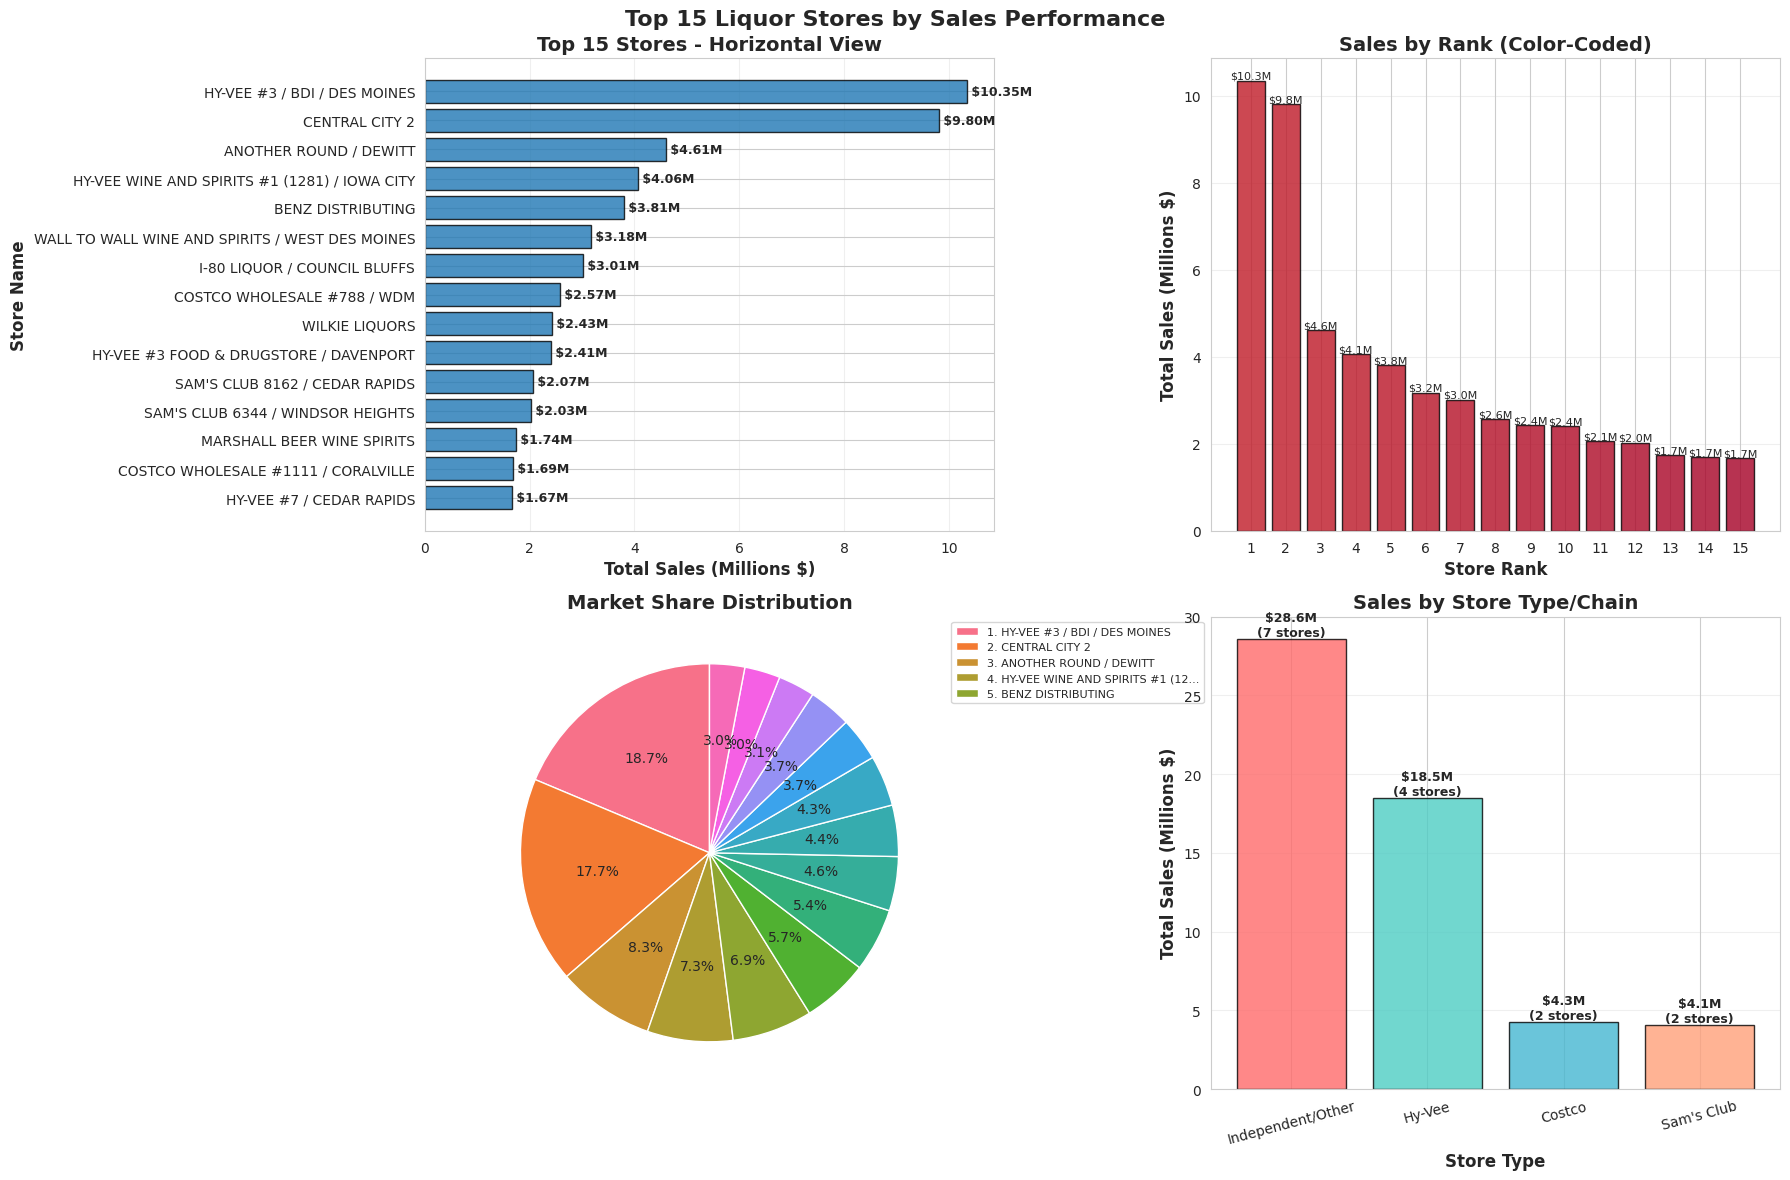


TOP 15 STORES SUMMARY STATISTICS
Total Sales (Top 15): $55.42M
Average Sales per Store: $3.69M
Median Sales: $2.57M

#1 Store: HY-VEE #3 / BDI / DES MOINES
   Sales: $10.35M

#15 Store: HY-VEE #7 / CEDAR RAPIDS
   Sales: $1.67M

Sales Gap (1st vs 15th): $8.68M

                         STORE TYPE BREAKDOWN                         
----------------------------------------------------------------------
Independent/Other   : $   28.59M ( 7 stores) -  51.6%
Hy-Vee              : $   18.48M ( 4 stores) -  33.3%
Costco              : $    4.26M ( 2 stores) -   7.7%
Sam's Club          : $    4.10M ( 2 stores) -   7.4%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('01_top_15_stores.csv')

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top 15 Liquor Stores by Sales Performance', fontsize=16, fontweight='bold')

# Plot 1: Horizontal Bar Chart (Main visualization)
axes[0, 0].barh(df['store_name'], df['total_sales_in_dollars'] / 1e6, color='#1f77b4', alpha=0.8, edgecolor='black')
axes[0, 0].set_xlabel('Total Sales (Millions $)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Store Name', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Top 15 Stores - Horizontal View', fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()  # Highest at top
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (store, sales) in enumerate(zip(df['store_name'], df['total_sales_in_dollars'])):
    axes[0, 0].text(sales / 1e6, i, f' ${sales/1e6:.2f}M',
                    va='center', fontsize=9, fontweight='bold')

# Plot 2: Vertical Bar Chart with color gradient
colors_gradient = plt.cm.RdYlGn(range(len(df)))[::-1]  # Green to red gradient
axes[0, 1].bar(range(len(df)), df['total_sales_in_dollars'] / 1e6,
               color=colors_gradient, alpha=0.8, edgecolor='black')
axes[0, 1].set_xlabel('Store Rank', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Total Sales (Millions $)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Sales by Rank (Color-Coded)', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(range(len(df)))
axes[0, 1].set_xticklabels(range(1, len(df) + 1))
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, sales in enumerate(df['total_sales_in_dollars']):
    axes[0, 1].text(i, sales / 1e6, f'${sales/1e6:.1f}M',
                    ha='center', va='bottom', fontsize=8, rotation=0)

# Plot 3: Pie Chart - Market Share
axes[1, 0].pie(df['total_sales_in_dollars'], labels=None, autopct='%1.1f%%',
               startangle=90, colors=sns.color_palette("husl", len(df)))
axes[1, 0].set_title('Market Share Distribution', fontsize=14, fontweight='bold')

# Add custom legend for pie chart (top 5 only for readability)
top5_labels = [f"{i+1}. {name[:30]}..." if len(name) > 30 else f"{i+1}. {name}"
               for i, name in enumerate(df['store_name'][:5])]
axes[1, 0].legend(top5_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

# Plot 4: Store Type Analysis
# Categorize stores
def categorize_store(name):
    name_upper = name.upper()
    if 'HY-VEE' in name_upper or 'HY VEE' in name_upper:
        return 'Hy-Vee'
    elif 'COSTCO' in name_upper:
        return 'Costco'
    elif "SAM'S CLUB" in name_upper or 'SAMS CLUB' in name_upper:
        return "Sam's Club"
    else:
        return 'Independent/Other'

df['store_type'] = df['store_name'].apply(categorize_store)
store_type_sales = df.groupby('store_type')['total_sales_in_dollars'].sum().sort_values(ascending=False)

colors_type = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
axes[1, 1].bar(store_type_sales.index, store_type_sales.values / 1e6,
               color=colors_type[:len(store_type_sales)], alpha=0.8, edgecolor='black')
axes[1, 1].set_xlabel('Store Type', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Total Sales (Millions $)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Sales by Store Type/Chain', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=15)

# Add value labels and store count
for i, (store_type, sales) in enumerate(store_type_sales.items()):
    count = len(df[df['store_type'] == store_type])
    axes[1, 1].text(i, sales / 1e6, f'${sales/1e6:.1f}M\n({count} stores)',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("TOP 15 STORES SUMMARY STATISTICS")
print("="*70)
print(f"Total Sales (Top 15): ${df['total_sales_in_dollars'].sum()/1e6:.2f}M")
print(f"Average Sales per Store: ${df['total_sales_in_dollars'].mean()/1e6:.2f}M")
print(f"Median Sales: ${df['total_sales_in_dollars'].median()/1e6:.2f}M")
print(f"\n#1 Store: {df.iloc[0]['store_name']}")
print(f"   Sales: ${df.iloc[0]['total_sales_in_dollars']/1e6:.2f}M")
print(f"\n#15 Store: {df.iloc[-1]['store_name']}")
print(f"   Sales: ${df.iloc[-1]['total_sales_in_dollars']/1e6:.2f}M")
print(f"\nSales Gap (1st vs 15th): ${(df.iloc[0]['total_sales_in_dollars'] - df.iloc[-1]['total_sales_in_dollars'])/1e6:.2f}M")

print(f"\n{'STORE TYPE BREAKDOWN':^70}")
print("-"*70)
for store_type, sales in store_type_sales.items():
    count = len(df[df['store_type'] == store_type])
    percentage = (sales / df['total_sales_in_dollars'].sum()) * 100
    print(f"{store_type:20s}: ${sales/1e6:>8.2f}M ({count:>2} stores) - {percentage:>5.1f}%")
print("="*70)

**Top 5 Counties Monthly Sales Trends and Seasonal Analysis**

Comprehensive time-series analysis of monthly liquor sales across Iowa's top 5 counties (Polk,
Linn, Scott, Black Hawk, and Johnson) from 2012-2025. Features trend lines, total and average
sales comparisons, seasonal patterns revealing peak sales months, and a year-over-year growth
heatmap highlighting performance changes across counties and years.

/tmp/ipython-input-1319851506.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


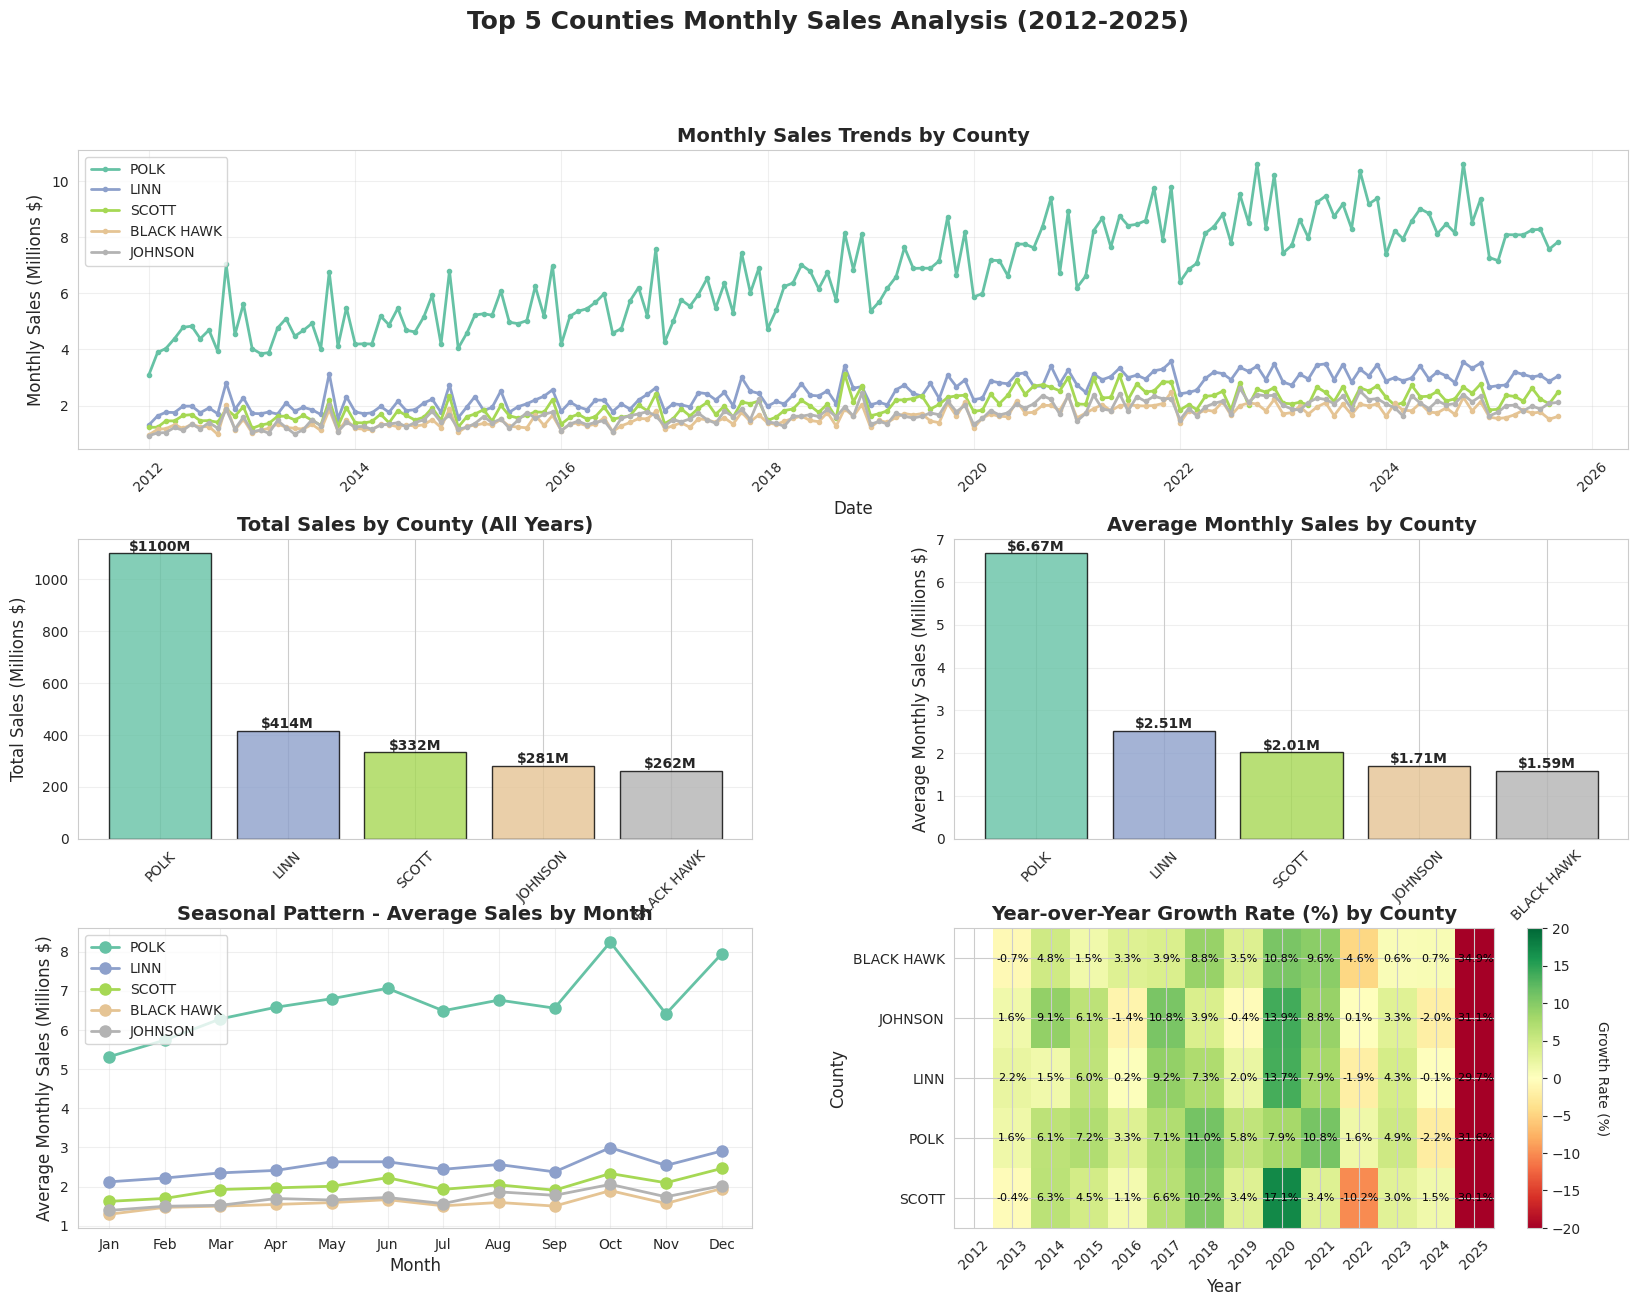


TOP 5 COUNTIES MONTHLY SALES SUMMARY

POLK COUNTY:
  Total Sales: $1100.42M
  Average Monthly: $6.67M
  Highest Month: $10.62M (2024-10)
  Lowest Month: $3.09M (2012-1)

LINN COUNTY:
  Total Sales: $414.45M
  Average Monthly: $2.51M
  Highest Month: $3.57M (2021-12)
  Lowest Month: $1.31M (2012-1)

SCOTT COUNTY:
  Total Sales: $332.40M
  Average Monthly: $2.01M
  Highest Month: $3.12M (2018-10)
  Lowest Month: $1.19M (2013-1)

BLACK HAWK COUNTY:
  Total Sales: $261.95M
  Average Monthly: $1.59M
  Highest Month: $2.47M (2021-12)
  Lowest Month: $0.95M (2012-1)

JOHNSON COUNTY:
  Total Sales: $281.47M
  Average Monthly: $1.71M
  Highest Month: $2.62M (2022-8)
  Lowest Month: $0.92M (2012-1)

SEASONAL INSIGHTS:
Highest Sales Month (Average): Oct ($3.51M)
Lowest Sales Month (Average): Jan ($2.35M)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('02_top_5_counties_per_month.csv')

# Create a date column for easier plotting
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 14)

# Create figure with subplots
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

fig.suptitle('Top 5 Counties Monthly Sales Analysis (2012-2025)', fontsize=18, fontweight='bold')

# Plot 1: Time Series - All Counties
ax1 = fig.add_subplot(gs[0, :])
counties = df['county'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(counties)))

for i, county in enumerate(counties):
    county_data = df[df['county'] == county]
    ax1.plot(county_data['date'], county_data['monthly_sales'] / 1e6,
             marker='o', label=county, linewidth=2, markersize=3, color=colors[i])

ax1.set_title('Monthly Sales Trends by County', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Monthly Sales (Millions $)', fontsize=12)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Total Sales by County (Bar Chart)
ax2 = fig.add_subplot(gs[1, 0])
total_by_county = df.groupby('county')['monthly_sales'].sum().sort_values(ascending=False)
bars = ax2.bar(total_by_county.index, total_by_county.values / 1e6,
               color=colors[:len(total_by_county)], alpha=0.8, edgecolor='black')
ax2.set_title('Total Sales by County (All Years)', fontsize=14, fontweight='bold')
ax2.set_xlabel('County', fontsize=12)
ax2.set_ylabel('Total Sales (Millions $)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (county, sales) in enumerate(total_by_county.items()):
    ax2.text(i, sales / 1e6, f'${sales/1e6:.0f}M',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 3: Average Monthly Sales by County
ax3 = fig.add_subplot(gs[1, 1])
avg_by_county = df.groupby('county')['monthly_sales'].mean().sort_values(ascending=False)
bars = ax3.bar(avg_by_county.index, avg_by_county.values / 1e6,
               color=colors[:len(avg_by_county)], alpha=0.8, edgecolor='black')
ax3.set_title('Average Monthly Sales by County', fontsize=14, fontweight='bold')
ax3.set_xlabel('County', fontsize=12)
ax3.set_ylabel('Average Monthly Sales (Millions $)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (county, sales) in enumerate(avg_by_county.items()):
    ax3.text(i, sales / 1e6, f'${sales/1e6:.2f}M',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Seasonal Pattern - Average Sales by Month
ax4 = fig.add_subplot(gs[2, 0])
monthly_pattern = df.groupby(['county', 'month'])['monthly_sales'].mean().reset_index()

for i, county in enumerate(counties):
    county_pattern = monthly_pattern[monthly_pattern['county'] == county]
    ax4.plot(county_pattern['month'], county_pattern['monthly_sales'] / 1e6,
             marker='o', label=county, linewidth=2, markersize=8, color=colors[i])

ax4.set_title('Seasonal Pattern - Average Sales by Month', fontsize=14, fontweight='bold')
ax4.set_xlabel('Month', fontsize=12)
ax4.set_ylabel('Average Monthly Sales (Millions $)', fontsize=12)
ax4.set_xticks(range(1, 13))
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax4.legend(loc='upper left', fontsize=10)
ax4.grid(True, alpha=0.3)

# Plot 5: Year-over-Year Growth Heatmap
ax5 = fig.add_subplot(gs[2, 1])
yearly_sales = df.groupby(['county', 'year'])['monthly_sales'].sum().unstack()
yearly_growth = yearly_sales.pct_change(axis=1) * 100

# Create heatmap
im = ax5.imshow(yearly_growth.values, cmap='RdYlGn', aspect='auto', vmin=-20, vmax=20)
ax5.set_xticks(range(len(yearly_growth.columns)))
ax5.set_xticklabels(yearly_growth.columns, rotation=45)
ax5.set_yticks(range(len(yearly_growth.index)))
ax5.set_yticklabels(yearly_growth.index)
ax5.set_title('Year-over-Year Growth Rate (%) by County', fontsize=14, fontweight='bold')
ax5.set_xlabel('Year', fontsize=12)
ax5.set_ylabel('County', fontsize=12)

# Add colorbar
cbar = plt.colorbar(im, ax=ax5)
cbar.set_label('Growth Rate (%)', rotation=270, labelpad=20)

# Add text annotations
for i in range(len(yearly_growth.index)):
    for j in range(len(yearly_growth.columns)):
        value = yearly_growth.values[i, j]
        if not np.isnan(value):
            text = ax5.text(j, i, f'{value:.1f}%',
                          ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("TOP 5 COUNTIES MONTHLY SALES SUMMARY")
print("="*80)

for county in counties:
    county_data = df[df['county'] == county]
    print(f"\n{county} COUNTY:")
    print(f"  Total Sales: ${county_data['monthly_sales'].sum()/1e6:.2f}M")
    print(f"  Average Monthly: ${county_data['monthly_sales'].mean()/1e6:.2f}M")
    print(f"  Highest Month: ${county_data['monthly_sales'].max()/1e6:.2f}M ({county_data.loc[county_data['monthly_sales'].idxmax(), 'year']}-{county_data.loc[county_data['monthly_sales'].idxmax(), 'month']})")
    print(f"  Lowest Month: ${county_data['monthly_sales'].min()/1e6:.2f}M ({county_data.loc[county_data['monthly_sales'].idxmin(), 'year']}-{county_data.loc[county_data['monthly_sales'].idxmin(), 'month']})")

print("\n" + "="*80)
print("SEASONAL INSIGHTS:")
print("="*80)
peak_months = df.groupby('month')['monthly_sales'].mean().sort_values(ascending=False)
print(f"Highest Sales Month (Average): {['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][int(peak_months.index[0])-1]} (${peak_months.values[0]/1e6:.2f}M)")
print(f"Lowest Sales Month (Average): {['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][int(peak_months.index[-1])-1]} (${peak_months.values[-1]/1e6:.2f}M)")
print("="*80)

**Counties with Highest Year-over-Year Sales Growth**

Analysis of year-over-year sales growth patterns for top-performing Iowa counties, featuring
annual sales trends, absolute and percentage growth rates, sales composition over time, and
comparative metrics. Highlights Polk County's market dominance with consistent growth from 2013
to 2024, and identifies periods of strongest expansion across counties.

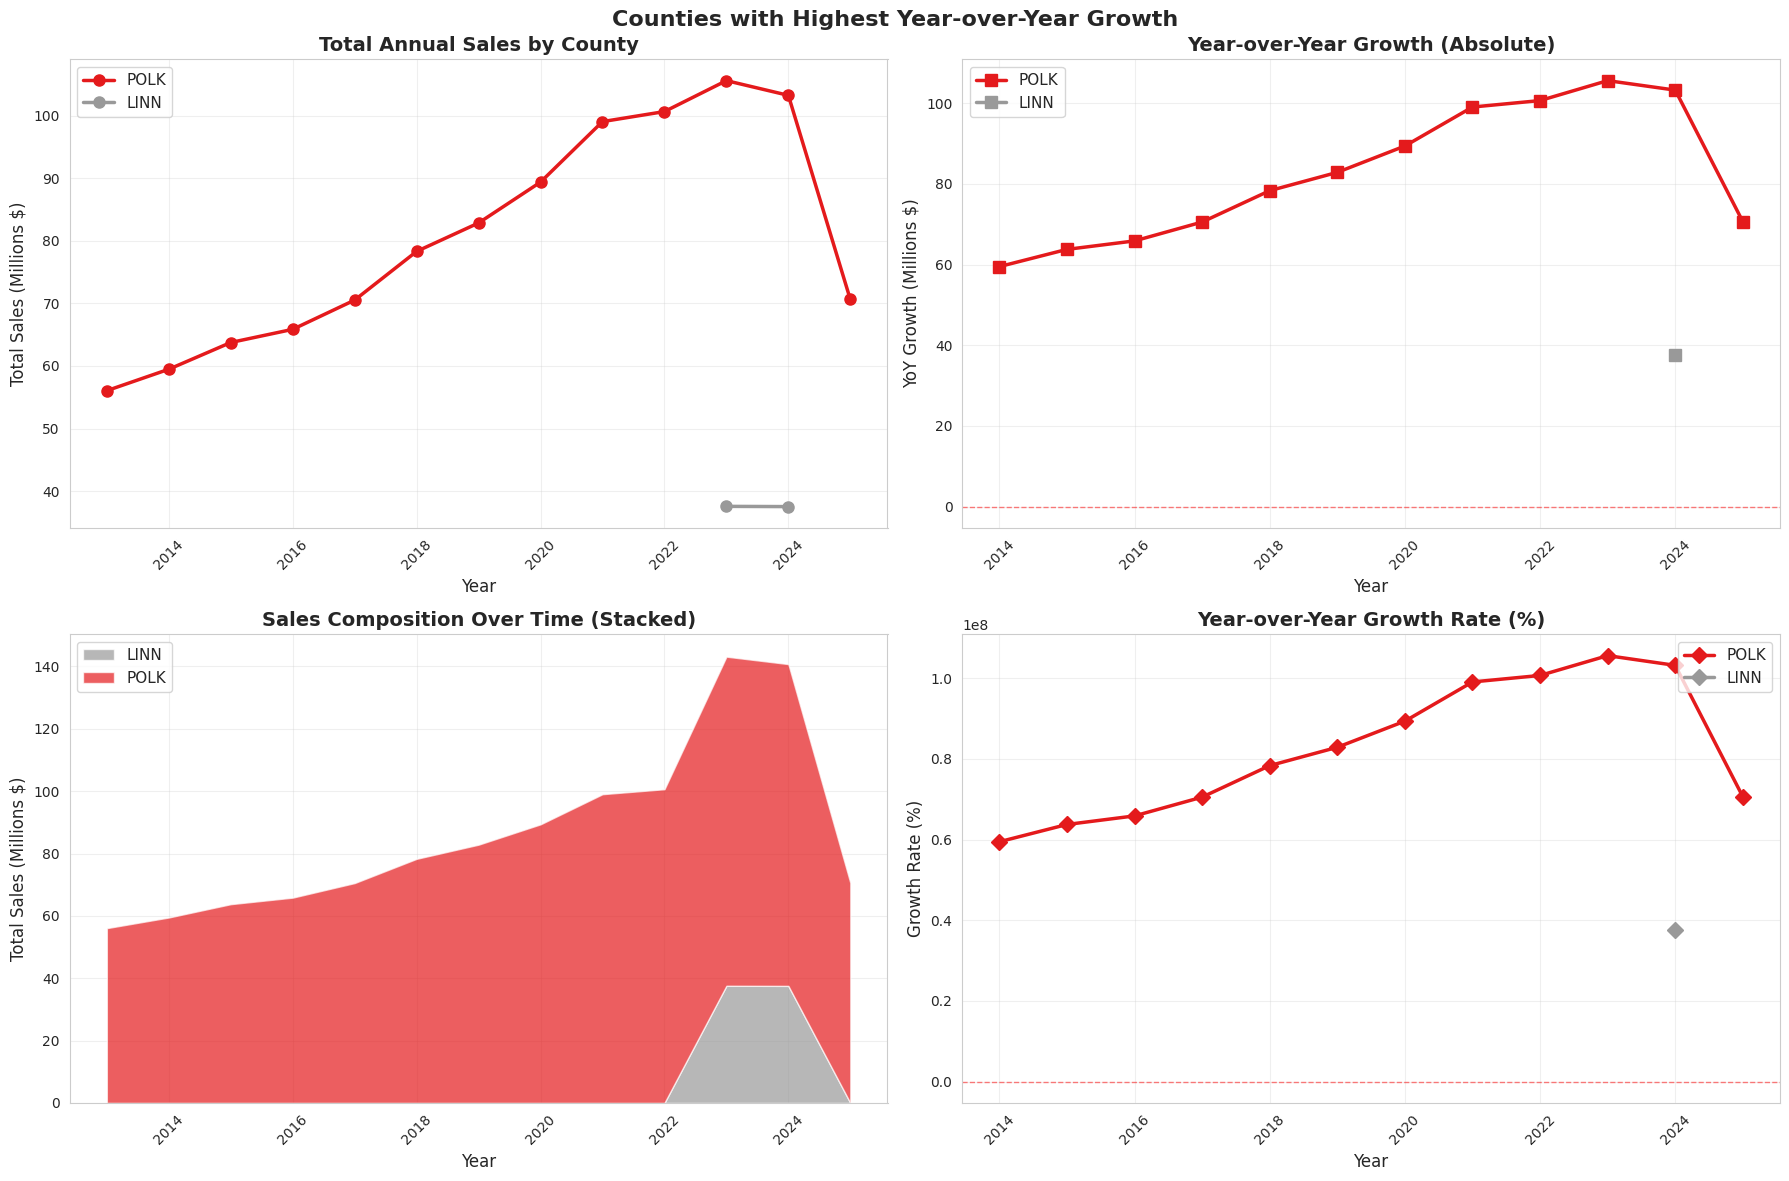

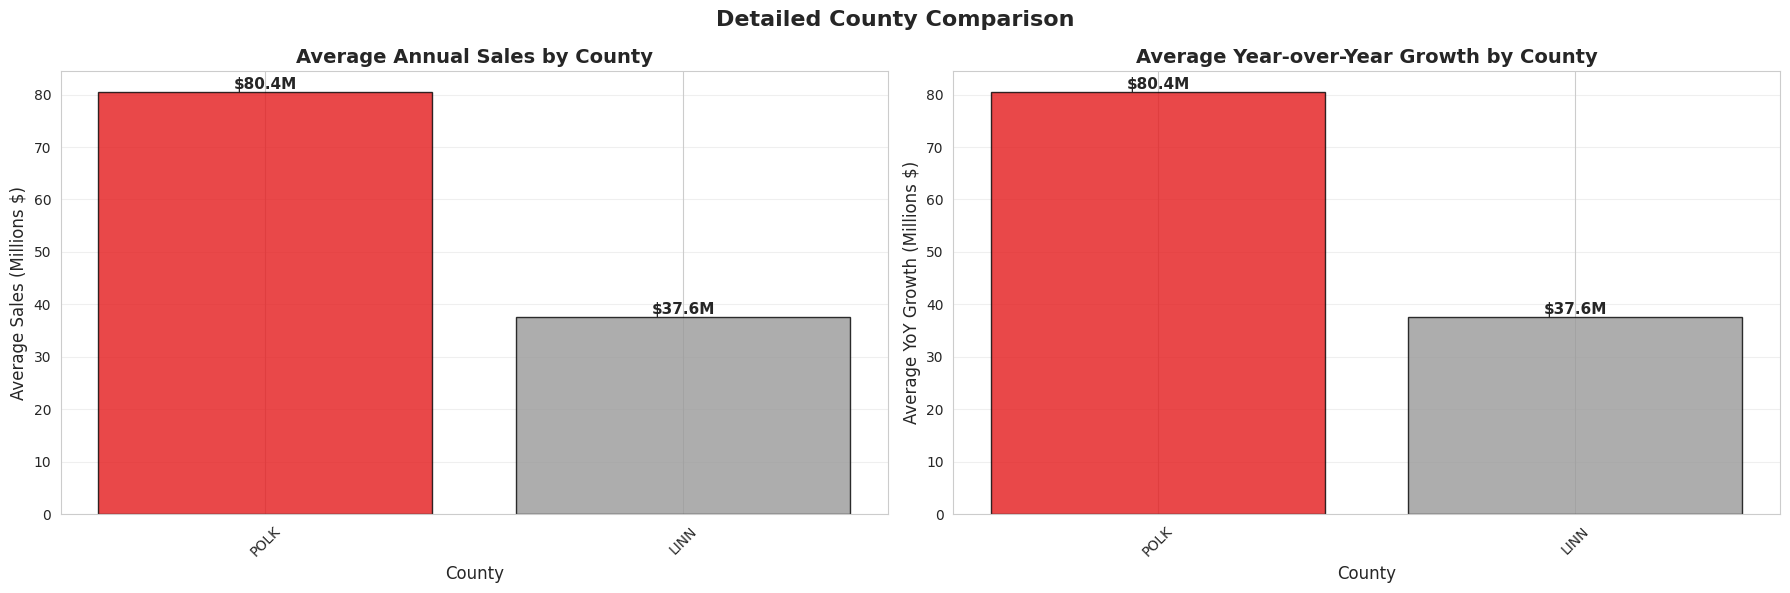


YEAR-OVER-YEAR GROWTH SUMMARY

POLK COUNTY:
  Years of Data: 13
  Total Sales Range: $56.06M - $105.57M
  Average Annual Sales: $80.40M
  Average YoY Growth: $80.40M
  Highest YoY Growth: $105.57M (2023)
  Average Growth Rate: 2.66%
  Highest Growth Rate: 11.02%

LINN COUNTY:
  Years of Data: 2
  Total Sales Range: $37.54M - $37.58M
  Average Annual Sales: $37.56M
  Average YoY Growth: $37.56M
  Highest YoY Growth: $37.58M (2023)
  Average Growth Rate: -0.10%
  Highest Growth Rate: -0.10%

OVERALL INSIGHTS:
Top County by Total Sales: POLK ($1045.23M)
Top County by Avg YoY Growth: POLK ($80.40M)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('03_counties_with_highest_yoy.csv')

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Counties with Highest Year-over-Year Growth', fontsize=16, fontweight='bold')

# Get unique counties and colors
counties = df['county'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(counties)))
county_colors = {county: colors[i] for i, county in enumerate(counties)}

# Plot 1: Total Sales Over Time by County
ax1 = axes[0, 0]
for county in counties:
    county_data = df[df['county'] == county].sort_values('year')
    ax1.plot(county_data['year'], county_data['total_sales'] / 1e6,
             marker='o', label=county, linewidth=2.5, markersize=8,
             color=county_colors[county])

ax1.set_title('Total Annual Sales by County', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Sales (Millions $)', fontsize=12)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Year-over-Year Growth by County
ax2 = axes[0, 1]
for county in counties:
    county_data = df[df['county'] == county].sort_values('year')
    # Skip first year (no YoY comparison)
    if len(county_data) > 1:
        ax2.plot(county_data['year'].iloc[1:], county_data['yoy_growth'].iloc[1:] / 1e6,
                 marker='s', label=county, linewidth=2.5, markersize=8,
                 color=county_colors[county])

ax2.set_title('Year-over-Year Growth (Absolute)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('YoY Growth (Millions $)', fontsize=12)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)

# Plot 3: Stacked Area Chart - Sales Composition
ax3 = axes[1, 0]
# Pivot data for stacked area
pivot_data = df.pivot(index='year', columns='county', values='total_sales').fillna(0)
pivot_data = pivot_data.sort_index()

ax3.stackplot(pivot_data.index,
              *[pivot_data[col] / 1e6 for col in pivot_data.columns],
              labels=pivot_data.columns,
              colors=[county_colors[col] for col in pivot_data.columns],
              alpha=0.7)

ax3.set_title('Sales Composition Over Time (Stacked)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Total Sales (Millions $)', fontsize=12)
ax3.legend(loc='upper left', fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Growth Rate Percentage (calculated)
ax4 = axes[1, 1]
for county in counties:
    county_data = df[df['county'] == county].sort_values('year')
    if len(county_data) > 1:
        # Calculate percentage growth
        growth_pct = (county_data['yoy_growth'] / (county_data['total_sales'] - county_data['yoy_growth'])) * 100
        ax4.plot(county_data['year'].iloc[1:], growth_pct.iloc[1:],
                 marker='D', label=county, linewidth=2.5, markersize=8,
                 color=county_colors[county])

ax4.set_title('Year-over-Year Growth Rate (%)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Growth Rate (%)', fontsize=12)
ax4.legend(loc='upper right', fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)
ax4.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

# Create second figure for detailed comparison
fig2, axes2 = plt.subplots(1, 2, figsize=(18, 6))
fig2.suptitle('Detailed County Comparison', fontsize=16, fontweight='bold')

# Plot 5: Bar chart - Average Annual Sales
ax5 = axes2[0]
avg_sales = df.groupby('county')['total_sales'].mean().sort_values(ascending=False)
bars = ax5.bar(range(len(avg_sales)), avg_sales.values / 1e6,
               color=[county_colors[c] for c in avg_sales.index],
               alpha=0.8, edgecolor='black')
ax5.set_xticks(range(len(avg_sales)))
ax5.set_xticklabels(avg_sales.index, rotation=45)
ax5.set_title('Average Annual Sales by County', fontsize=14, fontweight='bold')
ax5.set_xlabel('County', fontsize=12)
ax5.set_ylabel('Average Sales (Millions $)', fontsize=12)
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (county, sales) in enumerate(avg_sales.items()):
    ax5.text(i, sales / 1e6, f'${sales/1e6:.1f}M',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 6: Bar chart - Average YoY Growth
ax6 = axes2[1]
avg_growth = df[df['yoy_growth'].notna()].groupby('county')['yoy_growth'].mean().sort_values(ascending=False)
bars = ax6.bar(range(len(avg_growth)), avg_growth.values / 1e6,
               color=[county_colors[c] for c in avg_growth.index],
               alpha=0.8, edgecolor='black')
ax6.set_xticks(range(len(avg_growth)))
ax6.set_xticklabels(avg_growth.index, rotation=45)
ax6.set_title('Average Year-over-Year Growth by County', fontsize=14, fontweight='bold')
ax6.set_xlabel('County', fontsize=12)
ax6.set_ylabel('Average YoY Growth (Millions $)', fontsize=12)
ax6.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (county, growth) in enumerate(avg_growth.items()):
    ax6.text(i, growth / 1e6, f'${growth/1e6:.1f}M',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("YEAR-OVER-YEAR GROWTH SUMMARY")
print("="*80)

for county in counties:
    county_data = df[df['county'] == county].sort_values('year')
    print(f"\n{county} COUNTY:")
    print(f"  Years of Data: {len(county_data)}")
    print(f"  Total Sales Range: ${county_data['total_sales'].min()/1e6:.2f}M - ${county_data['total_sales'].max()/1e6:.2f}M")
    print(f"  Average Annual Sales: ${county_data['total_sales'].mean()/1e6:.2f}M")

    if len(county_data) > 1:
        valid_growth = county_data[county_data['yoy_growth'].notna()]
        if len(valid_growth) > 0:
            print(f"  Average YoY Growth: ${valid_growth['yoy_growth'].mean()/1e6:.2f}M")
            print(f"  Highest YoY Growth: ${valid_growth['yoy_growth'].max()/1e6:.2f}M ({valid_growth.loc[valid_growth['yoy_growth'].idxmax(), 'year']})")

            # Calculate growth rate
            growth_rates = []
            for i in range(1, len(county_data)):
                prev_sales = county_data.iloc[i-1]['total_sales']
                curr_sales = county_data.iloc[i]['total_sales']
                growth_rate = ((curr_sales - prev_sales) / prev_sales) * 100
                growth_rates.append(growth_rate)

            if growth_rates:
                print(f"  Average Growth Rate: {np.mean(growth_rates):.2f}%")
                print(f"  Highest Growth Rate: {np.max(growth_rates):.2f}%")

print("\n" + "="*80)
print(f"OVERALL INSIGHTS:")
print("="*80)
total_by_county = df.groupby('county')['total_sales'].sum().sort_values(ascending=False)
print(f"Top County by Total Sales: {total_by_county.index[0]} (${total_by_county.values[0]/1e6:.2f}M)")

avg_growth_by_county = df[df['yoy_growth'].notna()].groupby('county')['yoy_growth'].mean().sort_values(ascending=False)
if len(avg_growth_by_county) > 0:
    print(f"Top County by Avg YoY Growth: {avg_growth_by_county.index[0]} (${avg_growth_by_county.values[0]/1e6:.2f}M)")
print("="*80)

**Top 10 Liquor Brands by Total Sales**

Comprehensive analysis of the best-selling liquor brands in Iowa, featuring sales rankings,
market share distribution, and cumulative sales concentration. Tito's Handmade Vodka leads
with $212M in sales, followed by Black Velvet and Fireball Cinnamon Whiskey. Includes market
concentration metrics showing how many brands account for 80% of total sales.

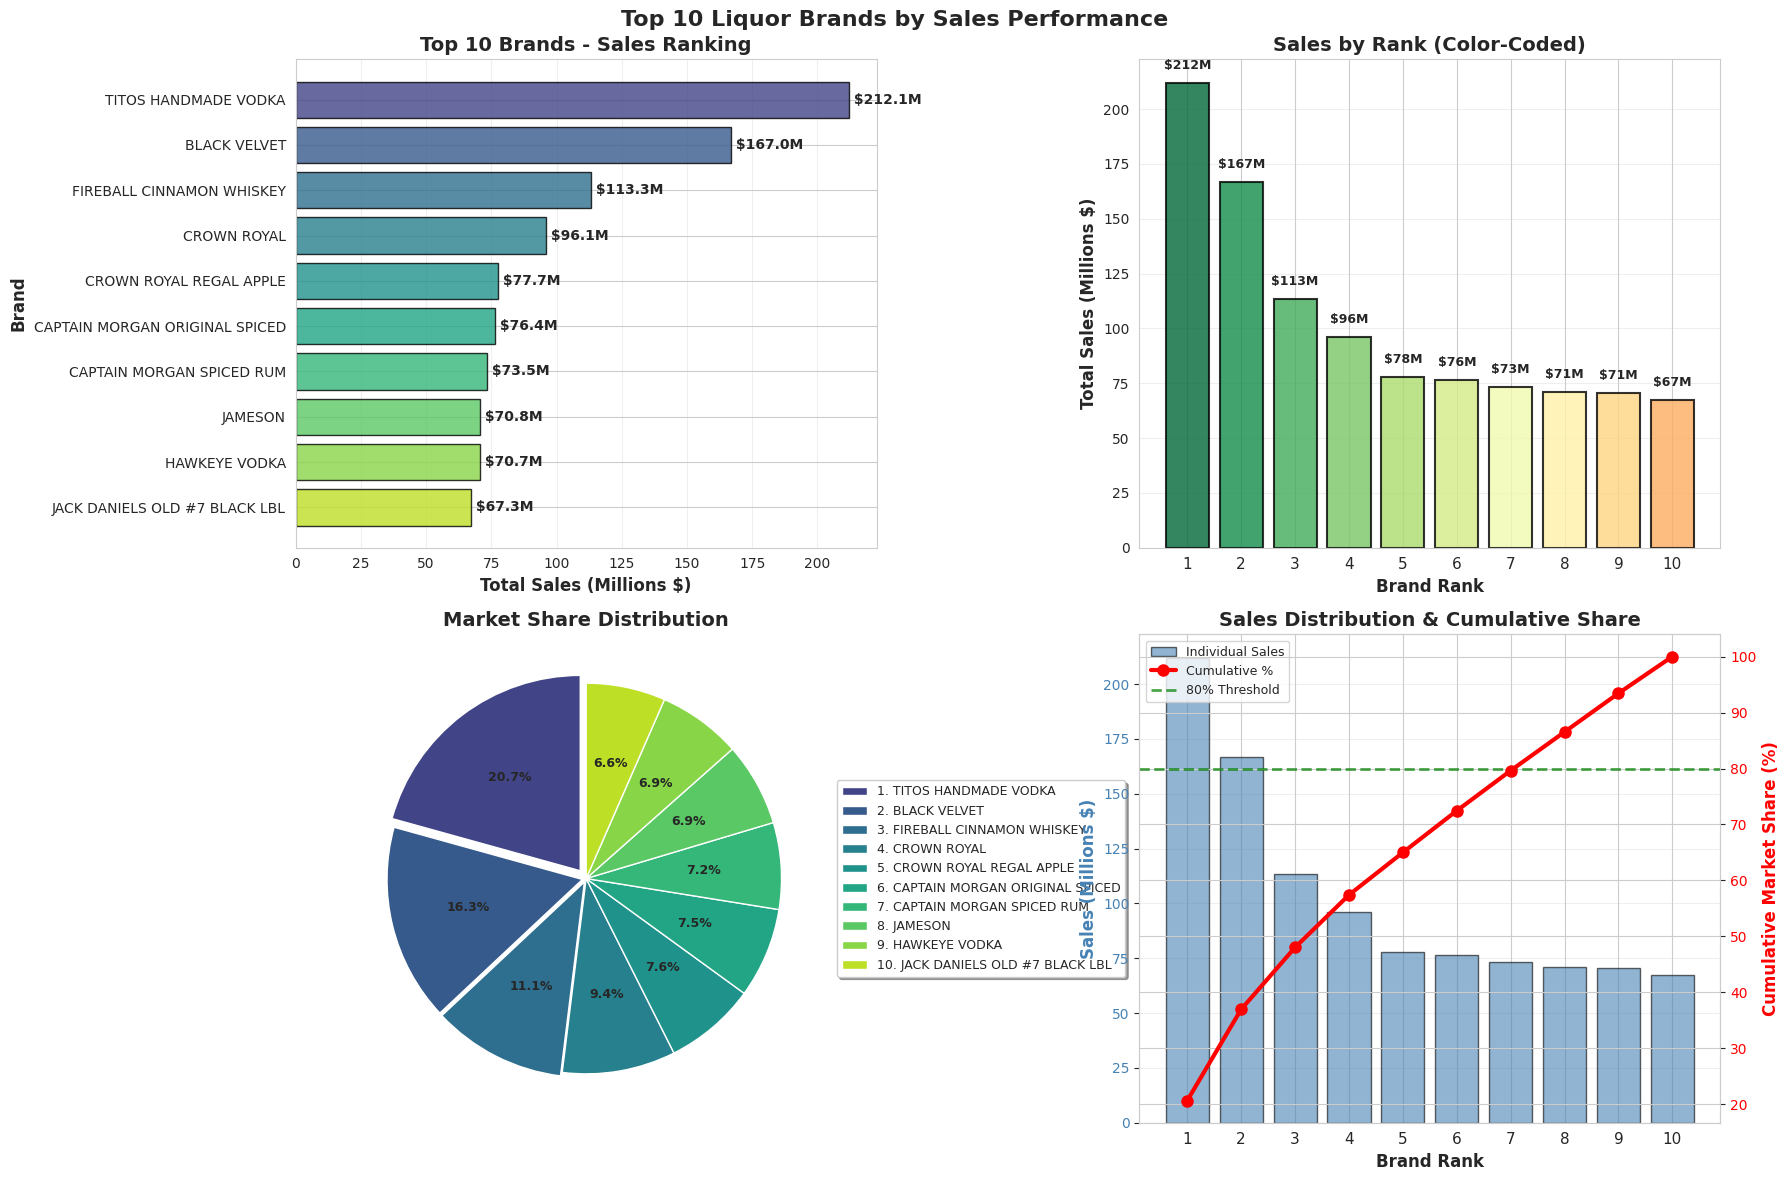


TOP 10 BRANDS SUMMARY STATISTICS
Total Sales (Top 10): $1024.86M
Average Sales per Brand: $102.49M
Median Sales: $77.06M

#1 Brand: TITOS HANDMADE VODKA
   Sales: $212.10M
   Market Share: 20.7%

#10 Brand: JACK DANIELS OLD #7 BLACK LBL
   Sales: $67.26M
   Market Share: 6.6%

Sales Gap (1st vs 10th): $144.84M
Sales Ratio (1st / 10th): 3.15x

MARKET CONCENTRATION ANALYSIS:
Top  1 brands:  20.7% of total sales
Top  2 brands:  37.0% of total sales
Top  3 brands:  48.0% of total sales
Top  4 brands:  57.4% of total sales
Top  5 brands:  65.0% of total sales
Top  6 brands:  72.5% of total sales
Top  7 brands:  79.6% of total sales
Top  8 brands:  86.5% of total sales

>>> 80% of sales concentrated in top 8 brands <<<

BRAND CATEGORIES:
Vodka: 2 brands - TITOS HANDMADE VODKA, HAWKEYE VODKA
Whiskey: 5 brands - FIREBALL CINNAMON WHISKEY, CROWN ROYAL, CROWN ROYAL REGAL APPLE, JAMESON, JACK DANIELS OLD #7 BLACK LBL
Rum: 2 brands - CAPTAIN MORGAN ORIGINAL SPICED, CAPTAIN MORGAN SPICED RUM
Other

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('04_top_brands.csv')

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top 10 Liquor Brands by Sales Performance', fontsize=16, fontweight='bold')

# Plot 1: Horizontal Bar Chart (Main visualization)
ax1 = axes[0, 0]
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(df)))
bars = ax1.barh(df['brand'], df['total_sales'] / 1e6, color=colors, alpha=0.8, edgecolor='black')
ax1.set_xlabel('Total Sales (Millions $)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Brand', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Brands - Sales Ranking', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (brand, sales) in enumerate(zip(df['brand'], df['total_sales'])):
    ax1.text(sales / 1e6, i, f' ${sales/1e6:.1f}M',
             va='center', fontsize=10, fontweight='bold')

# Plot 2: Vertical Bar Chart with Gradient
ax2 = axes[0, 1]
colors_gradient = plt.cm.RdYlGn(np.linspace(0.3, 1, len(df)))[::-1]
bars = ax2.bar(range(len(df)), df['total_sales'] / 1e6,
               color=colors_gradient, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Brand Rank', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Sales (Millions $)', fontsize=12, fontweight='bold')
ax2.set_title('Sales by Rank (Color-Coded)', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(df)))
ax2.set_xticklabels(range(1, len(df) + 1), fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, sales in enumerate(df['total_sales']):
    ax2.text(i, sales / 1e6 + 5, f'${sales/1e6:.0f}M',
             ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=0)

# Plot 3: Pie Chart - Market Share
ax3 = axes[1, 0]
explode = [0.05 if i == 0 else 0.02 if i < 3 else 0 for i in range(len(df))]
wedges, texts, autotexts = ax3.pie(df['total_sales'],
                                     labels=None,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     explode=explode,
                                     textprops={'fontsize': 9, 'fontweight': 'bold'})
ax3.set_title('Market Share Distribution', fontsize=14, fontweight='bold')

# Create custom legend
legend_labels = [f"{i+1}. {brand}" for i, brand in enumerate(df['brand'])]
ax3.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=9, frameon=True, shadow=True)

# Plot 4: Cumulative Sales
ax4 = axes[1, 1]
cumulative_sales = df['total_sales'].cumsum()
cumulative_pct = (cumulative_sales / df['total_sales'].sum()) * 100

# Bar chart
bars = ax4.bar(range(len(df)), df['total_sales'] / 1e6,
               color='steelblue', alpha=0.6, edgecolor='black', label='Individual Sales')

# Line chart for cumulative
ax4_twin = ax4.twinx()
line = ax4_twin.plot(range(len(df)), cumulative_pct,
                     color='red', marker='o', linewidth=3, markersize=8,
                     label='Cumulative %', zorder=5)

ax4.set_xlabel('Brand Rank', fontsize=12, fontweight='bold')
ax4.set_ylabel('Sales (Millions $)', fontsize=12, fontweight='bold', color='steelblue')
ax4_twin.set_ylabel('Cumulative Market Share (%)', fontsize=12, fontweight='bold', color='red')
ax4.set_title('Sales Distribution & Cumulative Share', fontsize=14, fontweight='bold')
ax4.set_xticks(range(len(df)))
ax4.set_xticklabels(range(1, len(df) + 1), fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')
ax4.tick_params(axis='y', labelcolor='steelblue')
ax4_twin.tick_params(axis='y', labelcolor='red')

# Add 80% reference line
ax4_twin.axhline(y=80, color='green', linestyle='--', linewidth=2, alpha=0.7, label='80% Threshold')

# Combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("TOP 10 BRANDS SUMMARY STATISTICS")
print("="*80)
print(f"Total Sales (Top 10): ${df['total_sales'].sum()/1e6:.2f}M")
print(f"Average Sales per Brand: ${df['total_sales'].mean()/1e6:.2f}M")
print(f"Median Sales: ${df['total_sales'].median()/1e6:.2f}M")

print(f"\n#1 Brand: {df.iloc[0]['brand']}")
print(f"   Sales: ${df.iloc[0]['total_sales']/1e6:.2f}M")
print(f"   Market Share: {(df.iloc[0]['total_sales']/df['total_sales'].sum())*100:.1f}%")

print(f"\n#10 Brand: {df.iloc[-1]['brand']}")
print(f"   Sales: ${df.iloc[-1]['total_sales']/1e6:.2f}M")
print(f"   Market Share: {(df.iloc[-1]['total_sales']/df['total_sales'].sum())*100:.1f}%")

print(f"\nSales Gap (1st vs 10th): ${(df.iloc[0]['total_sales'] - df.iloc[-1]['total_sales'])/1e6:.2f}M")
print(f"Sales Ratio (1st / 10th): {df.iloc[0]['total_sales'] / df.iloc[-1]['total_sales']:.2f}x")

print("\n" + "="*80)
print("MARKET CONCENTRATION ANALYSIS:")
print("="*80)
cumulative = 0
for i, row in df.iterrows():
    cumulative += row['total_sales']
    pct = (cumulative / df['total_sales'].sum()) * 100
    print(f"Top {i+1:2d} brands: {pct:5.1f}% of total sales")
    if pct >= 80 and i > 0:
        print(f"\n>>> 80% of sales concentrated in top {i+1} brands <<<")
        break

print("\n" + "="*80)
print("BRAND CATEGORIES:")
print("="*80)

# Categorize by spirit type
vodka_brands = [b for b in df['brand'] if 'VODKA' in b]
whiskey_brands = [b for b in df['brand'] if 'WHISKEY' in b or 'CROWN' in b or 'JACK DANIELS' in b or 'JAMESON' in b]
rum_brands = [b for b in df['brand'] if 'RUM' in b or 'CAPTAIN MORGAN' in b]
other_brands = [b for b in df['brand'] if b not in vodka_brands + whiskey_brands + rum_brands]

print(f"Vodka: {len(vodka_brands)} brands - {', '.join(vodka_brands)}")
print(f"Whiskey: {len(whiskey_brands)} brands - {', '.join(whiskey_brands)}")
print(f"Rum: {len(rum_brands)} brands - {', '.join(rum_brands)}")
if other_brands:
    print(f"Other: {len(other_brands)} brands - {', '.join(other_brands)}")

print("="*80)